In [64]:
# import library
import math
import pandas_datareader as web 
import numpy as np 
import seaborn as sns 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

In [65]:
# get stock quote
df = web.DataReader('TSLA', data_source='yahoo', start='2017-06-06', end='2020-10-9')
# show data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-06,71.898003,67.994003,68.940002,70.570000,55434000.0,70.570000
2017-06-07,72.099998,71.028000,71.267998,71.930000,46990000.0,71.930000
2017-06-08,74.379997,72.043999,72.750000,74.000000,45307500.0,74.000000
2017-06-09,75.374001,70.959999,74.884003,71.463997,86307000.0,71.463997
2017-06-12,72.900002,70.124001,71.598000,71.802002,52588500.0,71.802002
...,...,...,...,...,...,...
2020-10-05,433.640015,419.329987,423.350006,425.679993,44722800.0,425.679993
2020-10-06,428.779999,406.049988,423.790009,413.980011,49146300.0,413.980011
2020-10-07,429.899994,413.850006,419.869995,425.299988,43127700.0,425.299988


In [66]:
df.shape

(844, 6)

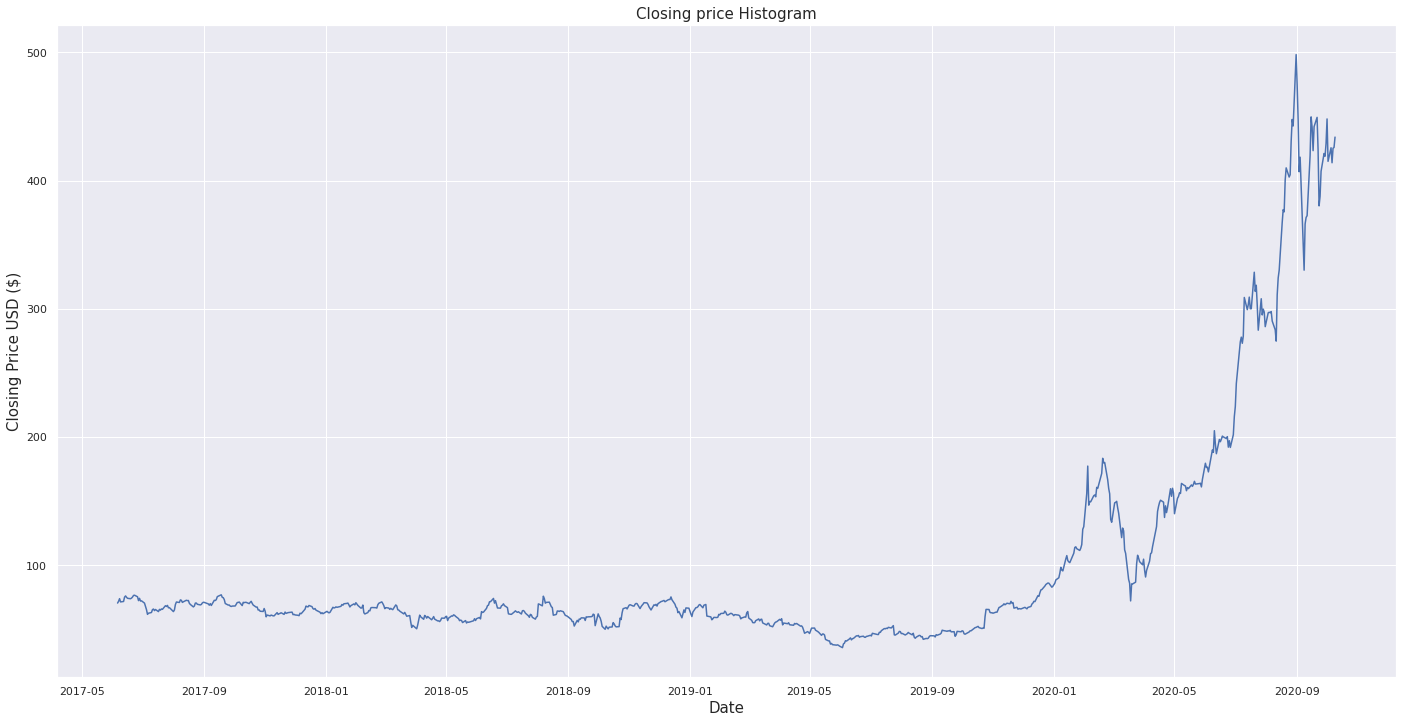

In [67]:
# Visualize
sns.set()
plt.figure(figsize=(24,12))
plt.title('Closing price Histogram', fontsize=15)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Closing Price USD ($)', fontsize=15)
plt.show()

In [68]:
# create new dataframe with only close 
data = df.filter(['Close'])
# creating numpy array
dataset = data.values
# get number of rows to train model
train_data_len = math.ceil(len(dataset) * 0.8)
train_data_len

676

In [69]:
# scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.07518713],
       [0.0781275 ],
       [0.08260293],
       [0.07711998],
       [0.07785076],
       [0.08517576],
       [0.0872124 ],
       [0.08491199],
       [0.08320829],
       [0.08251644],
       [0.08357152],
       [0.08537033],
       [0.0880556 ],
       [0.08841882],
       [0.08584166],
       [0.07930365],
       [0.08313911],
       [0.07860315],
       [0.07897502],
       [0.07508768],
       [0.06404829],
       [0.05615252],
       [0.05805079],
       [0.05927451],
       [0.06410451],
       [0.06509904],
       [0.06245703],
       [0.06434665],
       [0.06079659],
       [0.06454557],
       [0.06325699],
       [0.06527201],
       [0.06461475],
       [0.07072035],
       [0.06945771],
       [0.07129545],
       [0.06723514],
       [0.06749891],
       [0.06248298],
       [0.06079659],
       [0.06352941],
       [0.07269645],
       [0.07694271],
       [0.07619031],
       [0.08053601],
       [0.07980525],
       [0.07628977],
       [0.077

In [70]:
train_data =scaled_data[0:train_data_len,:]
# split the data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60: i, 0])
  y_train.append(train_data[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.07518713, 0.0781275 , 0.08260293, 0.07711998, 0.07785076,
       0.08517576, 0.0872124 , 0.08491199, 0.08320829, 0.08251644,
       0.08357152, 0.08537033, 0.0880556 , 0.08841882, 0.08584166,
       0.07930365, 0.08313911, 0.07860315, 0.07897502, 0.07508768,
       0.06404829, 0.05615252, 0.05805079, 0.05927451, 0.06410451,
       0.06509904, 0.06245703, 0.06434665, 0.06079659, 0.06454557,
       0.06325699, 0.06527201, 0.06461475, 0.07072035, 0.06945771,
       0.07129545, 0.06723514, 0.06749891, 0.06248298, 0.06079659,
       0.06352941, 0.07269645, 0.07694271, 0.07619031, 0.08053601,
       0.07980525, 0.07628977, 0.07735781, 0.079922  , 0.07928636,
       0.07953715, 0.07478499, 0.07285644, 0.06870533, 0.07021443,
       0.07515254, 0.07522172, 0.07311157, 0.07207812, 0.07281321])]
[0.07532982409716885]

[array([0.07518713, 0.0781275 , 0.08260293, 0.07711998, 0.07785076,
       0.08517576, 0.0872124 , 0.08491199, 0.08320829, 0.08251644,
       0.08357152, 0.08537033, 0.08

In [71]:
# convert x and y to numpy arrey
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
# reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(616, 60, 1)

In [73]:
# build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [74]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [75]:
# train mode
model.fit(x_train, y_train, batch_size=1, epochs=1)

616/616 [==============================] - 13s 21ms/step - loss: 3.0326e-04


In [76]:
# create new array
test_data = scaled_data[train_data_len - 60: , :]
# create x and y test
x_test = []
y_test = dataset[train_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [77]:
# convert data to numpy
x_test = np.array(x_test)

In [78]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) 

In [79]:
# get models predicted price values xtest
pred = model.predict(x_test) 
pred = scaler.inverse_transform(pred)

In [80]:
# evaluate model using RMSE
rmse = np.sqrt(np.mean(pred - y_test)**2)
rmse

97.56249863760812

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


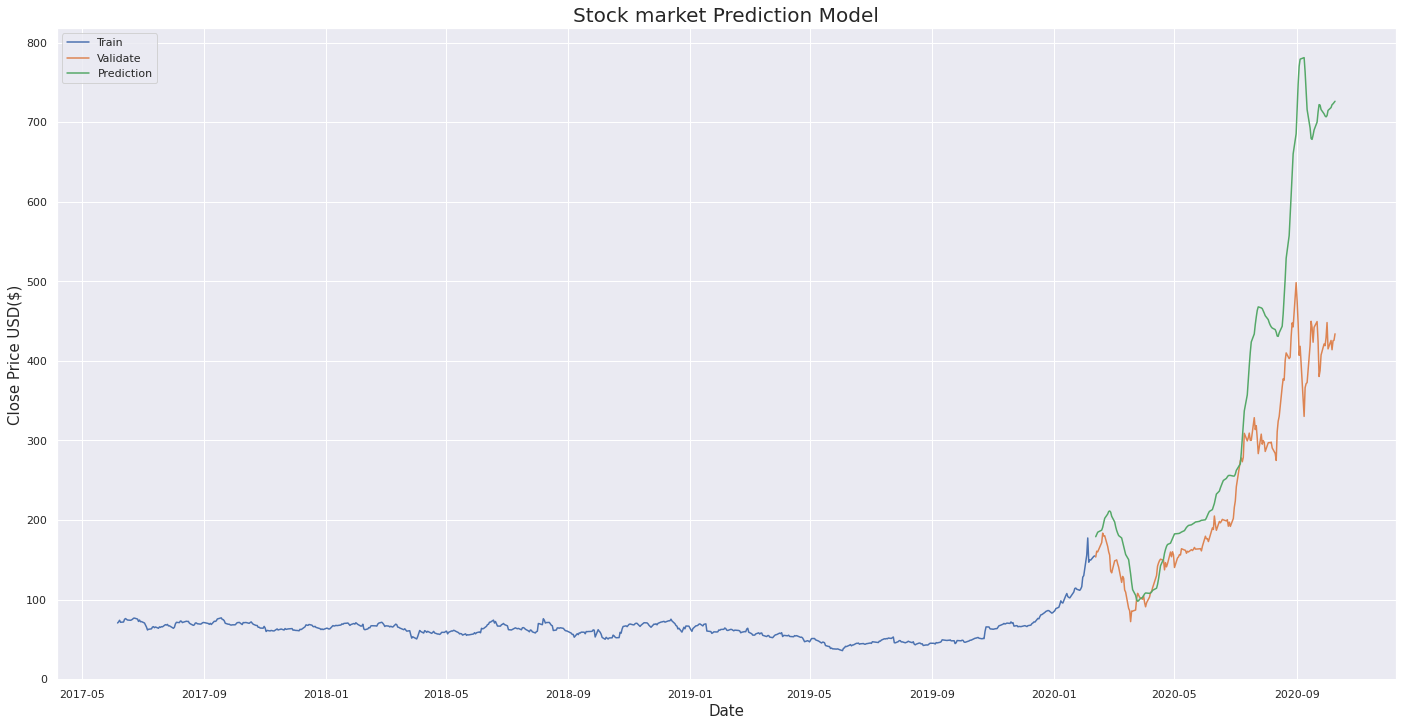

In [81]:
# plot data
train = data[:train_data_len]
valid = data[train_data_len:]
valid['predictions'] = pred
# visualize data
plt.figure(figsize=(24,12))
plt.title('Stock market Prediction Model', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD($)', fontsize=15) 
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Validate', 'Prediction'], loc='upper left')
plt.show()

In [82]:
# show the valid price and predected price
valid

,Close,predictions
Date,,
2020-02-12,153.457993,179.004684
2020-02-13,160.800003,181.797089
2020-02-14,160.005997,184.667679
2020-02-18,171.679993,187.251968
2020-02-19,183.483994,190.897537
...,...,...
2020-10-05,425.679993,718.362183
2020-10-06,413.980011,721.883362
2020-10-07,425.299988,723.070251


In [83]:
# prediction price quote
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2017-06-06', end='2020-06-11')
# create new dataframe
new_df = tesla_quote.filter(['Close'])
# get the last 60 day closing price
last_60 =new_df[-60:].values
# scaled the data to be values between 0 & 1
last_60_scaled = scaler.transform(last_60)
# create an empty list
X_test = []
# append past 60 day
X_test.append(last_60_scaled)
# convert array
X_test = np.array(X_test)
# Reshape
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[232.516]]


In [84]:
# actual price
tesla_quote2 = web.DataReader('TSLA', data_source='yahoo', start='2020-10-09', end='2020-10-09')
print(tesla_quote2['Close'])

Date
2020-10-09    433.950012
2020-10-09    434.000000
Name: Close, dtype: float64
